<a href="https://colab.research.google.com/github/kanchandhole/Data-Scientist/blob/main/EDA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
from google.colab import files

In [142]:
uploaded = files.upload()

Saving spotify.csv to spotify (1).csv


In [143]:
df = pd.read_csv('spotify.csv')

In [144]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [145]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [146]:
df.shape

(440, 5)

**Q1.**Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [147]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [148]:
df.duplicated().sum()

np.int64(27)

In [149]:
df_copy = df.drop_duplicates().reset_index(drop = True)

In [150]:
df_copy.duplicated().sum()

np.int64(0)

**Q2.**What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [151]:
df_copy['Track ID'].duplicated().sum()

np.int64(0)

In [152]:
df_copy.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


In [153]:
dist_amoung_track_and_popularity = df_copy.groupby('Popularity')['Track ID'].describe()

In [154]:
dist_amoung_track_and_popularity.sort_values(by = 'count', ascending = False).head(10)

,count,unique,top,freq
Popularity,,,,
76,23,23,7r6PigmGzlB3YPB7wvBBbi,1
79,21,21,44L2bY93uD65CEHWbozpx4,1
84,19,19,3a1lNhkSLSkpJE4MSHpDu9,1
71,18,18,0dKg2vGC1hFqcK5LGTaKzX,1
82,18,18,52NGJPcLUzQq5w7uv4e5gf,1
78,18,18,5Z9KJZvQzH6PFmb8SNkxuk,1
77,16,16,1oHNvJVbFkexQc0BpQp7Y4,1
81,16,16,0puf9yIluy9W0vpMEUoAnN,1
75,16,16,1K5KBOgreBi5fkEHvg5ap3,1


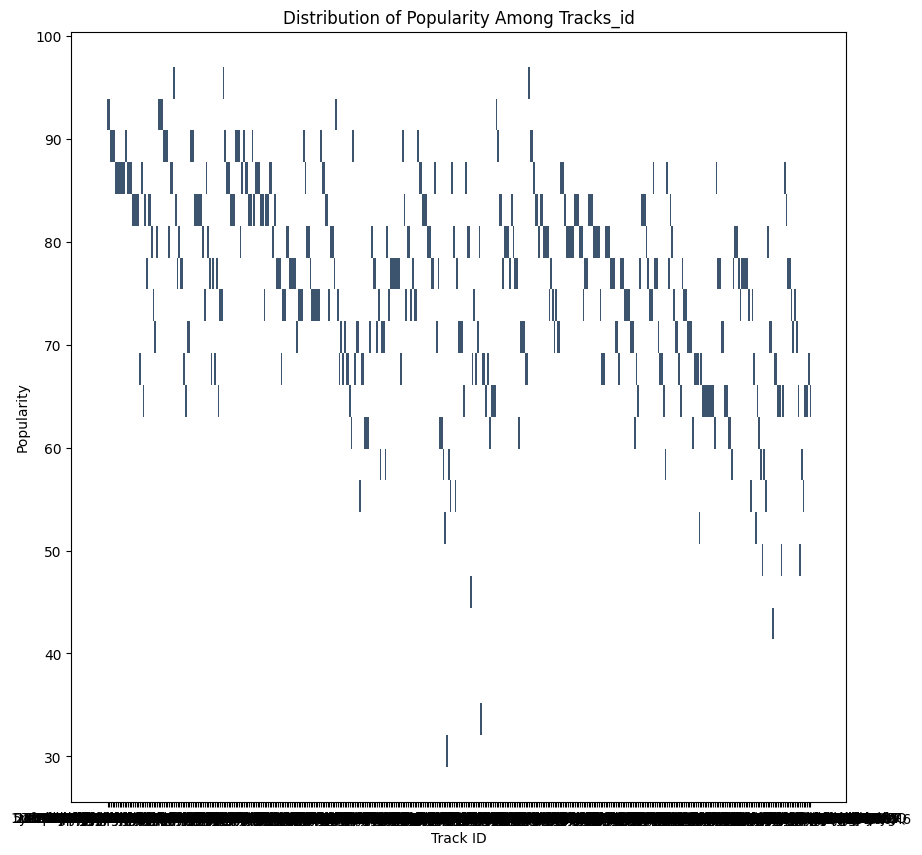

In [155]:
plt.figure(figsize = (10,10))
sns.histplot(data = df_copy, x='Track ID' , y = 'Popularity' ,kde = True)
plt.title('Distribution of Popularity Among Tracks_id')
plt.xlabel('Track ID')
plt.ylabel('Popularity')
plt.show()

**Q2.**Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [156]:
feature = df_copy[['Track ID','Popularity']]

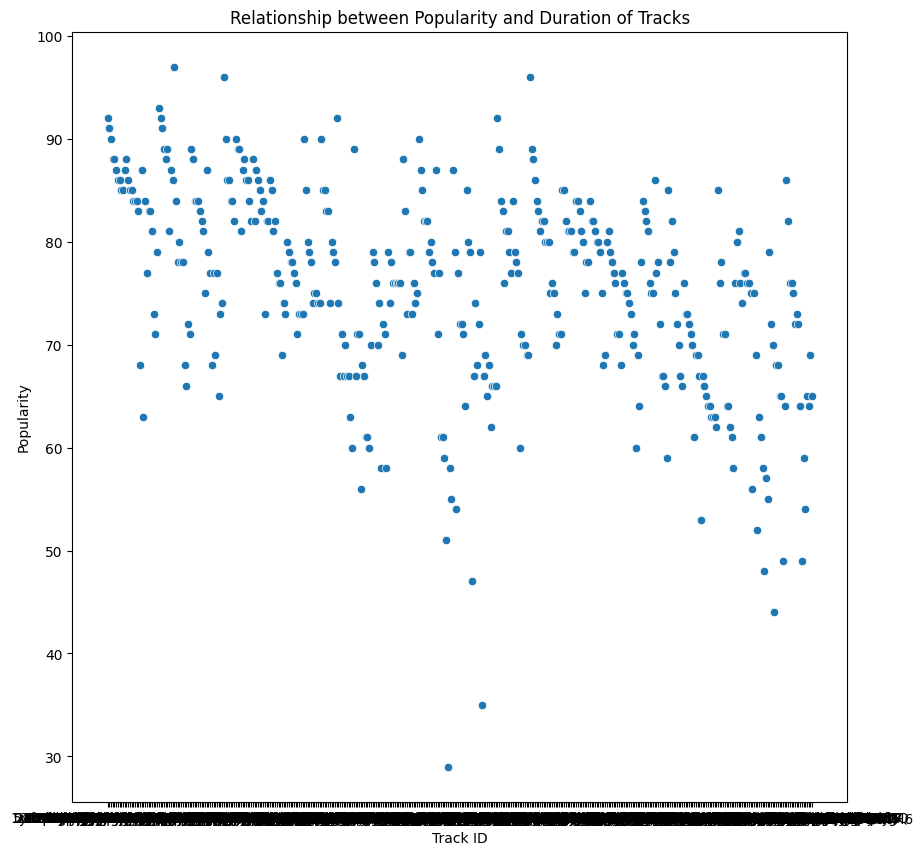

In [157]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = feature, x = 'Track ID', y = 'Popularity')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Track ID')
plt.ylabel('Popularity')
plt.show()

**Q4.**Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

In [158]:
highest_no_of_track = df_copy.groupby('Artist')['Track ID'].count()

In [159]:
highest_no_of_track

,Track ID
Artist,
*NSYNC,1
2 Chainz,1
21 Savage,10
A Boogie Wit da Hoodie,1
A$AP Ferg,1
...,...
Young Nudy,1
Young Thug,4
benny blanco,1


In [160]:
highest_no_of_track.max()

17

In [161]:
highest_no_of_track.sort_values(ascending = False).head(1)

,Track ID
Artist,
Drake,17


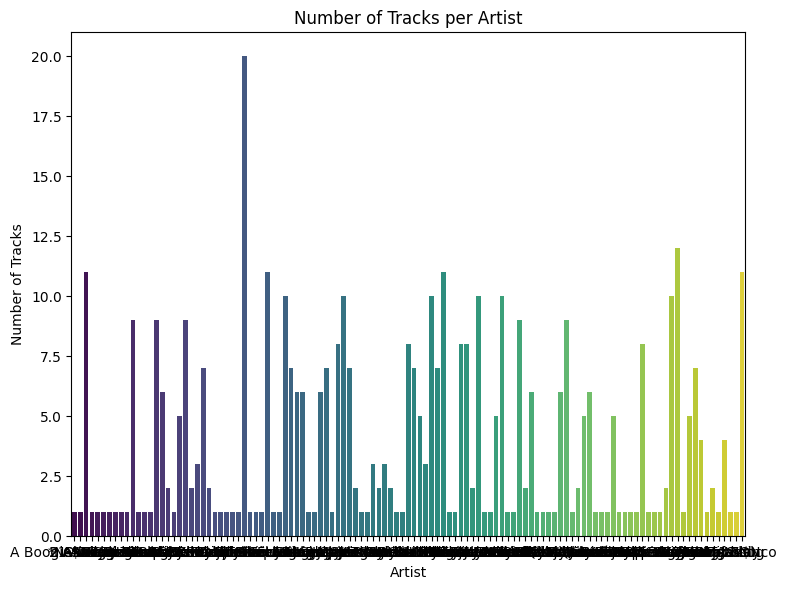

In [162]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Artist', order=highest_no_of_track.index, palette='viridis')
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()

**Q5.**What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [163]:
least_popular_tracks = df_copy.sort_values(by='Popularity', ascending=True).head(5)

In [164]:
least_popular_tracks[['Artist','Track Name','Popularity']]

,Artist,Track Name,Popularity
199,Pressa,Attachments (feat. Coi Leray),29
219,Justin Bieber,Intentions,35
390,French Montana,Splash Brothers,44
213,Lil Baby,On Me - Remix,47
384,Wyclef Jean,911 (feat. Mary J. Blige),48


**Q6**.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [165]:
top_five_popularity_artist = df_copy.sort_values(by='Popularity', ascending=False).head(5)

In [166]:
top_five_popularity_artist

,Artist,Track Name,Popularity,Duration (ms),Track ID
39,Jack Harlow,Lovin On Me,97,138411,4xhsWYTOGcal8zt0J161CU
247,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
68,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


In [167]:
avg_popularity = df_copy.groupby('Artist')['Popularity'].mean().reset_index()

In [168]:
avg_popularity

,Artist,Popularity
0,*NSYNC,67.00
1,2 Chainz,72.00
2,21 Savage,83.80
3,A Boogie Wit da Hoodie,80.00
4,A$AP Ferg,69.00
...,...,...
110,Young Nudy,67.00
111,Young Thug,73.75
112,benny blanco,72.00
113,cassö,92.00


**Q7.**For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [169]:
top_five_popularity_artist = df_copy.sort_values(by='Popularity', ascending=False).head(5)

In [170]:
top_five_popularity_artist

,Artist,Track Name,Popularity,Duration (ms),Track ID
39,Jack Harlow,Lovin On Me,97,138411,4xhsWYTOGcal8zt0J161CU
247,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
68,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


**Q8.**Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [177]:
df_copy.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [173]:
numerical_columns = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [174]:
numerical_columns

['Popularity', 'Duration (ms)']

In [181]:
df_copy[numerical_columns]

,Popularity,Duration (ms)
0,92,319191
1,91,173986
2,90,260111
3,88,247444
4,88,218364
...,...,...
408,54,163971
409,65,187521
410,64,191900
411,69,283693


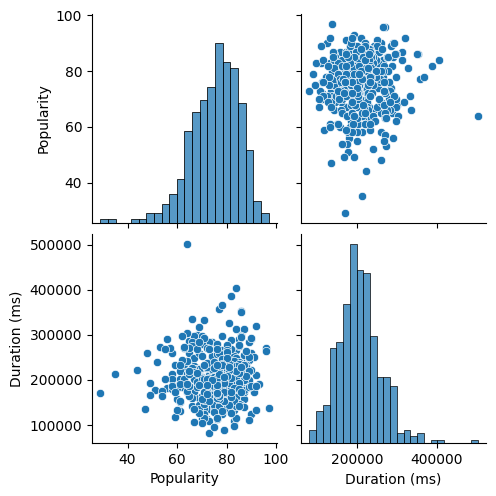

In [182]:
sns.pairplot(df_copy[numerical_columns])

**Q9.**Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

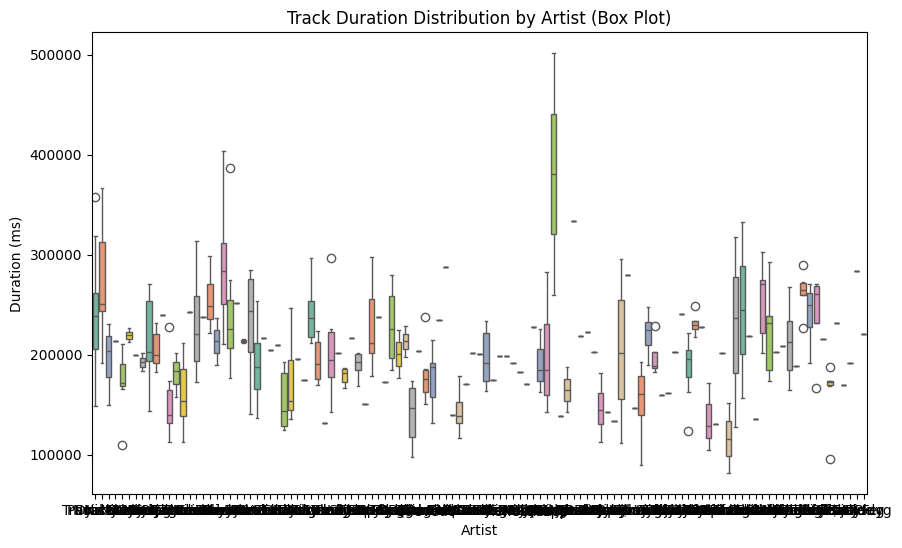

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Artist', y='Duration (ms)', data=df_copy, palette='Set2')
plt.title('Track Duration Distribution by Artist (Box Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

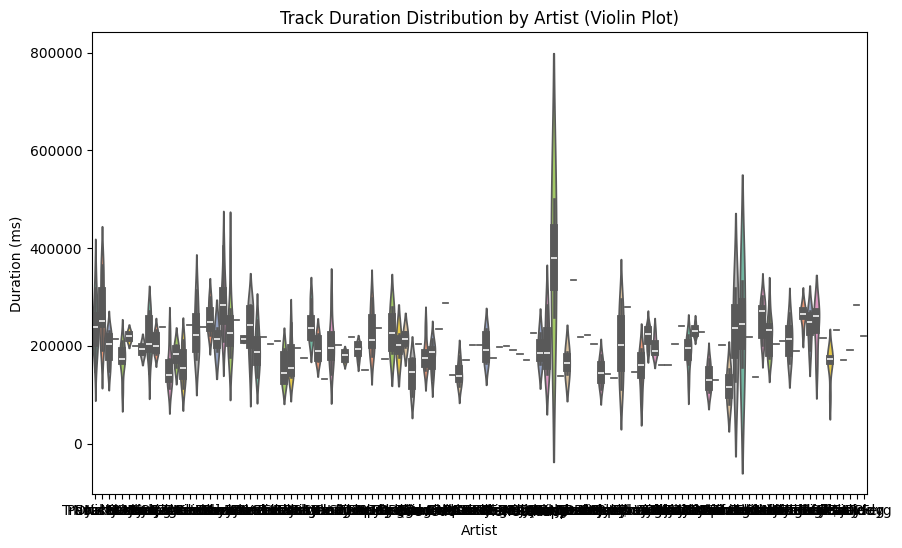

In [185]:
plt.figure(figsize=(10, 6))
sns.violinplot(x= 'Artist', y='Duration (ms)', data=df_copy, palette='Set2')
plt.title('Track Duration Distribution by Artist (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

**Q10.**How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

In [186]:
dist_of_track_popularity = df_copy.groupby('Artist')['Popularity'].describe()

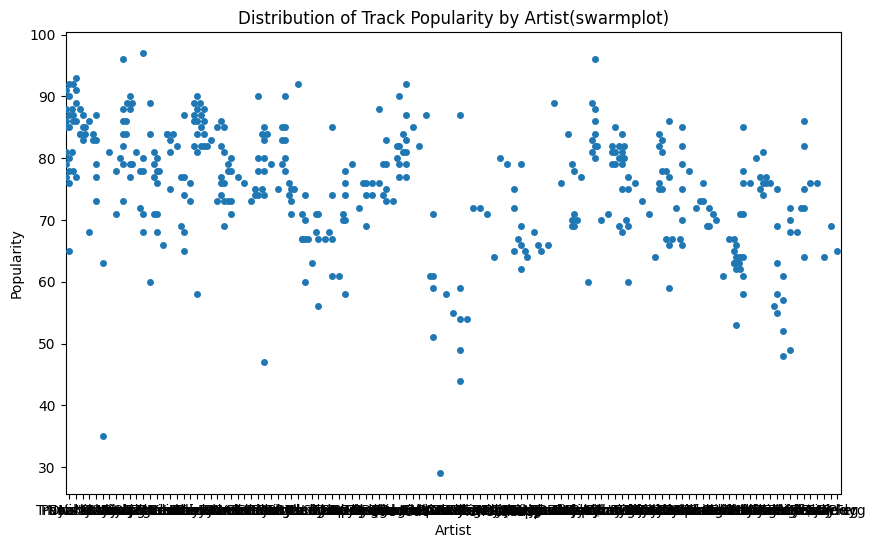

In [189]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data= df_copy , x ='Artist', y= 'Popularity')
plt.title('Distribution of Track Popularity by Artist(swarmplot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

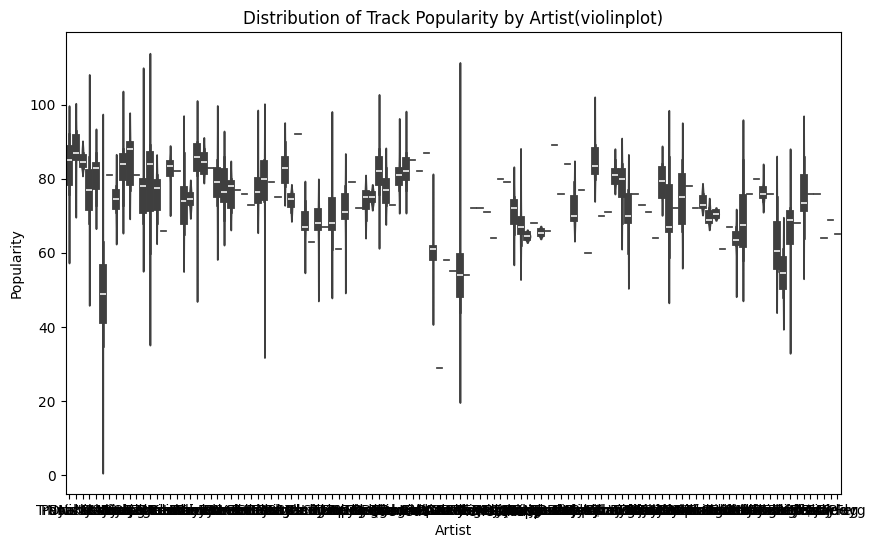

In [190]:
plt.figure(figsize=(10, 6))
sns.violinplot(data= df_copy , x ='Artist', y= 'Popularity')
plt.title('Distribution of Track Popularity by Artist(violinplot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()